# Сборный проект. Исследование интернет-магазина «Стримчик»

### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных  
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы проданных копий)  
EU_sales — продажи в Европе (миллионы проданных копий)  
JP_sales — продажи в Японии (миллионы проданных копий)  
Other_sales — продажи в других странах (миллионы проданных копий)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from datetime import datetime
from IPython.display import display
import copy 
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0}) 

In [2]:
data = pd.read_csv('/datasets/games.csv')
#посмотрим типы данных и кол-во ненулевых значений
display(data.head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Мы можем сказать, что у нас есть много пропусков, которые нам нужно будет либо удалить, либо преобразовать.

# Шаг 2 Подготовка данных

Замените названия столбцов (приведите к нижнему регистру)

In [4]:
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему
Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам; Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать

In [5]:
#Выведу  основную информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


user_score - это же численный показатель, а имеет тип object - меняем на 'float'.

In [6]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [7]:
#проверка пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
#оценим доли пропусков
data.isna().sum() / data.shape[0]

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

In [9]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [10]:
#меняем тип данных
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Года и оценки критиков меняем на целые числа, year_of_release и critic_score в тип integer, но сначала избавимся от пропусков

Обработка пропусков

Практически половина данных отсутствует по столбцам critic_score, rating и user_score. Столбец year_of_release также имеет пропуски, однако сравнительно немного. Есть пропуски в столбце name их всего два, возможно есть смысл вовсе от них избавить общую картину они нам не помогут сложить и мешать не будут. 



In [11]:
#проверка пропусков
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Для дальнейшего анализа нам важно знать года выпуска игр, но в этом столбце у нас 269 пропусков, восстановить и заменить мы их никак не сможем, поэтому просто дропнем

In [12]:
data.drop(data[data['year_of_release'].isna()].index,inplace=True)
data['year_of_release'] = pd.to_numeric(data['year_of_release'], downcast='integer')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int16  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int16(1), object(4)
memory usage: 1.4+ MB


Удалим дубликаты

In [13]:
data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int16  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int16(1), object(4)
memory usage: 1.4+ MB


Пропуски в столбцах user_score и rating возможно обусловлены тем, что оценка игр походит не быстро, а может даже вообще не пройти. Из-за этого в большинстве случаев отсутсвуют оценки игроков или ESRB оценка, заменим условным обозначением 

In [14]:
data['user_score'] = data['user_score'].astype('float')
data['rating'] = data['rating'].fillna('unknown')

In [15]:
data['critic_score'] = data['critic_score'].astype('float')
data['year_of_release'] = data['year_of_release'].astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [16]:

data['sales_total'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


#### Краткий вывод:  

Я провела работу по подготовке данных к дальнейшему исследованию, а именно:  
1. Название столбцов было приведено к нижнему регистру  
2. Восстановлены пропуски в строках.  
3. Удалены строки без нужных данных.  
4. Добавлен столбец суммарных продаж.  


# Шаг 3. Проведите исследовательский анализ данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?  
Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?  
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.  
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.  
Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.  
Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.  
Соотнесите выводы с продажами игр на других платформах.  
Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<function matplotlib.pyplot.show(close=None, block=None)>

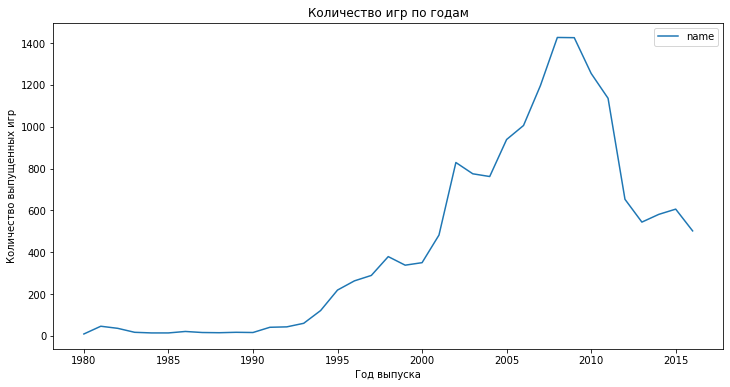

In [17]:
games_by_each_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12,6))
sns.lineplot(data=games_by_each_year)
sns.set_style('darkgrid')
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.show

Пр графику видно, что с 1993 года количество игр начинает ежегодно расти быстрыми темпоми. Можно объяснить это развитием компьютеров. Не последнее место сыграло существенное развитие технологий трехмерной графики. Постепенно набирали популярность игровые приставки, такие как Nintendo, Playstation и XBOX. Данный рост продолжается до 2008 года.

В начале 2000х растущие скорости доступа в интернет делают возможным становление браузера как самостоятельной игровой платформы и рост социальных сетей. Разработчики игр теперь просто не могут игнорировать браузерную платформу и внутри нее выделяется отдельная платформа и игры под нее. Все это, плюс появление мобильных платформ iOS и Android как раз на рубеже 2008 года, поспособствовало частичной смене акцентов в пользу мобильных приложений и мобильных игр. Отсюда виден резкий спад консольных игр, начиная с 2009 по 2016гг.  


Text(0, 0.5, 'Количество продаж')

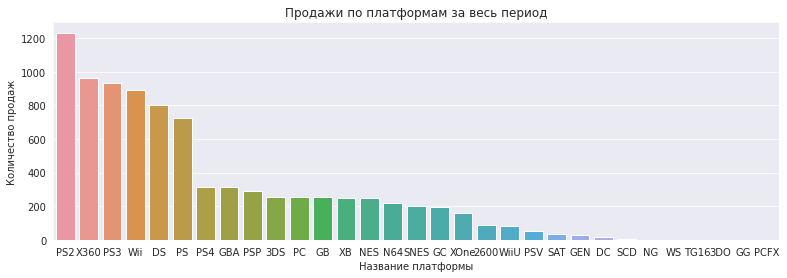

In [18]:
sales_on_platform = data.pivot_table(index='platform', values='sales_total', aggfunc='sum').sort_values(
    by='sales_total', ascending=False)

plt.figure(figsize=(13,4))
sns.barplot(x=sales_on_platform.index,y=sales_on_platform['sales_total'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Из графика видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS.

In [19]:
platform_sales_pivot_table = pd.pivot_table(data, index=['platform'], values='sales_total', aggfunc='sum')
platform_sales_pivot_table = platform_sales_pivot_table.sort_values('sales_total',ascending=False).head(6).reset_index()
platform_sales_pivot_table

,platform,sales_total
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58


In [20]:
top_platforms_list = platform_sales_pivot_table['platform'].tolist()
type (top_platforms_list)

list

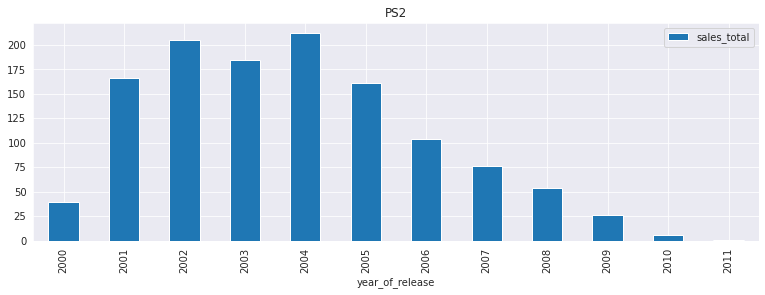

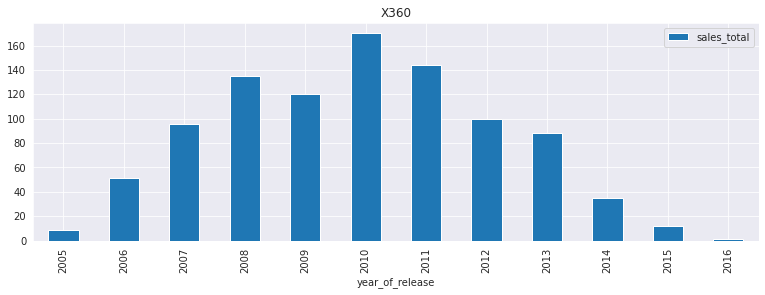

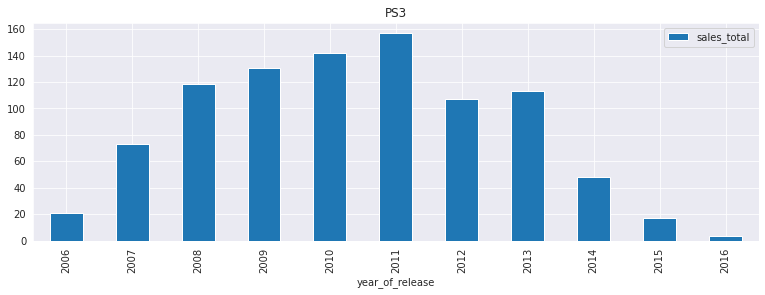

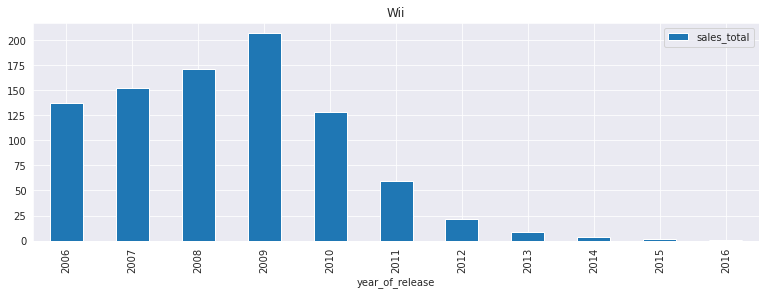

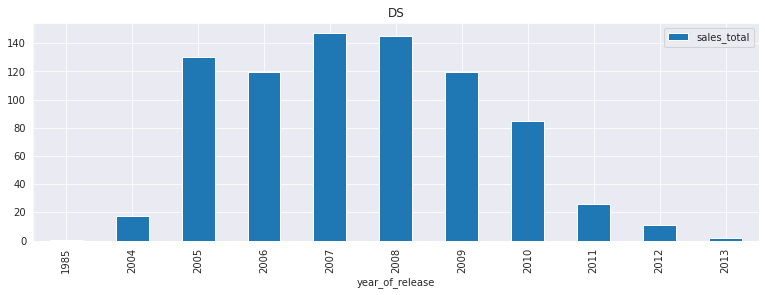

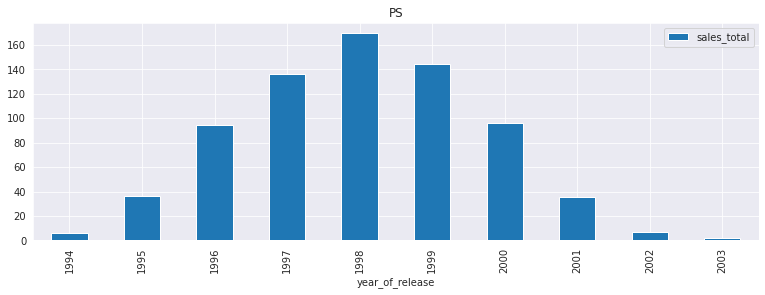

In [21]:
#Построим распределения по годам
for platform in top_platforms_list:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='sales_total', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform)

Отталкиваясь от диаграмм распределения, можно сделать вывод, что средний период 'жизни' платформ длится 10 лет.  
Пятерка лидирующих по продажам за всё время платформ в нашем датасете теряет свои показатели в 2016г  
Большая часть платформ из нашего списка уже исчезли, из живущих в 2016 году, можно отметить: PS4, PC, Nintendo 3DS, XBOX One, Nintendo Wii U, PlayStation Vita.

Определим период, за который нужно взять данные для дальнейшего исследования. 

In [22]:
#будем рассматривать только конечный на данный момент интервал развития игровой индустрии
actual_data_games_sales = data.query('year_of_release > 2012')
actual_data_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  sales_total      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


In [23]:
best_sales_platform = pd.pivot_table(actual_data_games_sales, index=['platform','year_of_release'], 
                                     values='sales_total', aggfunc = 'sum')
best_sales_platform

sales_total
platform year_of_release             
3DS      2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
DS       2013                    1.54
PC       2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
PS3      2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
PSP      2013                    3.14
         2014                    0.24
         2015                    0.12
PSV      2013                   10.59
         2014                   11.90
         2015                    6.25
         2016                    4.25
Wii      2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU     2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60
X360     2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

In [24]:
actual_data_games_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_total
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [25]:
best_sales_platform = pd.pivot_table(actual_data_games_sales, index='platform', 
                                     values='sales_total', aggfunc = 'sum')
best_sales_platform.sort_values('sales_total', ascending=False)

,sales_total
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Топ 5 платформ по миру: PS4, PS3, XOne, X360 и 3DS.

Продажи растут у PS4, XOne, 3DS, WiiU и PSV, так как они заменяют предыдущее поколение игровых приставок. На убыль идут приставки предыдущего поколения

Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам

In [26]:
#Сохраним только последние поколения платформ и избавимся от выбросов
games_top_6_platforms = actual_data_games_sales[actual_data_games_sales['platform'].isin(['PS2', 'X360', 'PS3', 'WII', 'DS', 'PS'])]
games_top_6_platforms = games_top_6_platforms[games_top_6_platforms['sales_total']<1.4]


In [27]:
games_top_6_platforms['sales_total'].describe()

count    490.000000
mean       0.287367
std        0.324011
min        0.010000
25%        0.050000
50%        0.145000
75%        0.420000
max        1.380000
Name: sales_total, dtype: float64

In [28]:
games_top_6_platforms['platform'].unique()

array(['X360', 'PS3', 'DS'], dtype=object)

Text(0, 0.5, 'Глобальные продажи')

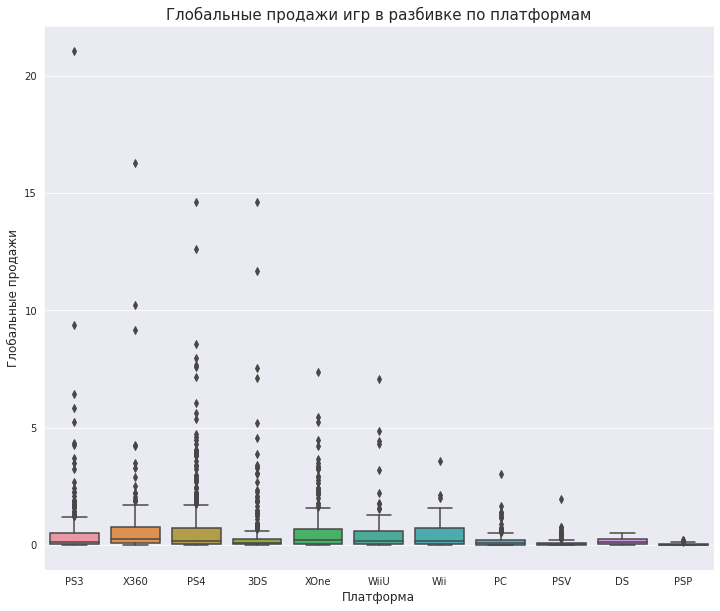

In [29]:
#Отрисуем ящики с усами 
plt.figure(figsize=(12,10))
sns.boxplot(data=actual_data_games_sales, x='platform', y='sales_total')
plt.title('Глобальные продажи игр в разбивке по платформам', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sales_total, dtype: float64

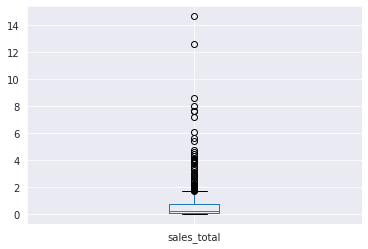

In [30]:
PS4_actual_data_games_sales = actual_data_games_sales.query('platform =="PS4"')
PS4_actual_data_games_sales.boxplot(column = 'sales_total')
PS4_actual_data_games_sales['sales_total'].describe()

In [31]:
PS4_sales_crit_and_user_ratings = PS4_actual_data_games_sales.loc[:,['sales_total', 'critic_score', 'user_score']]
PS4_sales_crit_and_user_ratings.head()

,sales_total,critic_score,user_score
31,14.63,NaN,NaN
42,12.62,97.0,8.3
77,8.58,82.0,4.3
87,7.98,NaN,NaN
92,7.66,83.0,5.7


In [32]:
PS4_sales_crit_and_user_ratings.corr()

,sales_total,critic_score,user_score
sales_total,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


array([[<AxesSubplot:xlabel='sales_total', ylabel='sales_total'>,
        <AxesSubplot:xlabel='critic_score', ylabel='sales_total'>,
        <AxesSubplot:xlabel='user_score', ylabel='sales_total'>],
       [<AxesSubplot:xlabel='sales_total', ylabel='critic_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='sales_total', ylabel='user_score'>,
        <AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>]],
      dtype=object)

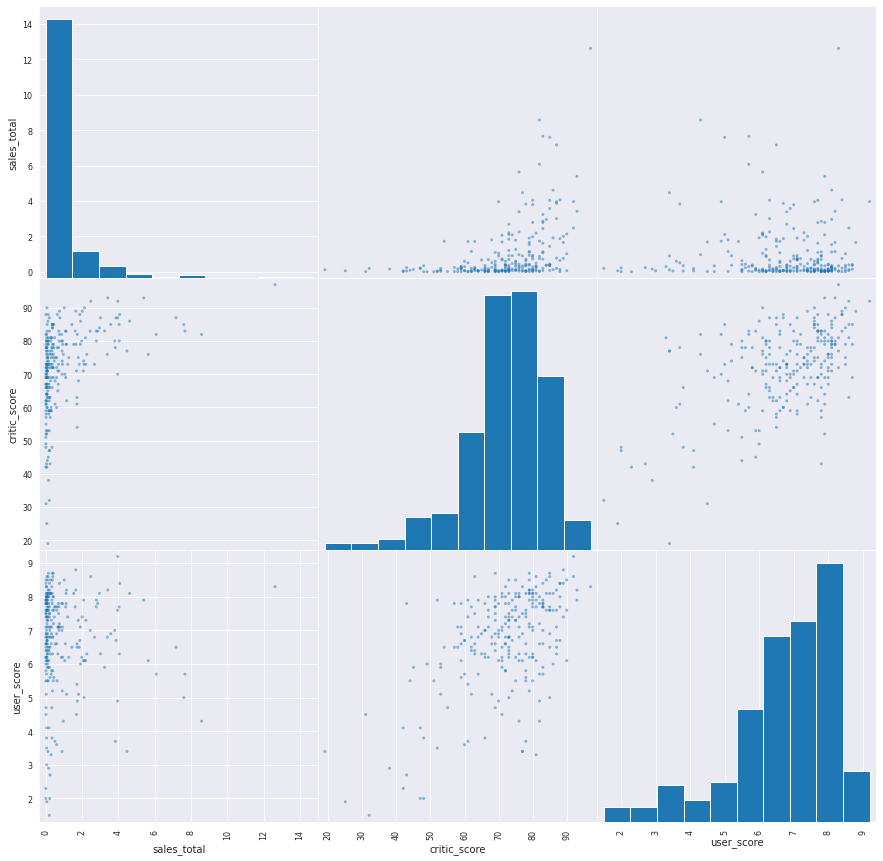

In [33]:
pd.plotting.scatter_matrix(PS4_sales_crit_and_user_ratings, figsize=(15, 15))

Для платформы PS4 важными критерием является качество игры. Поэтому есть прямая корреляция между прибылью и рейтингом критиков.

Посмотрим на зависимость продаж от оценки пользователей и критиов первой по популярности платформы PS4

Text(0.5, 1.0, 'Корреляция между продажами и оценками пользователей PS4')

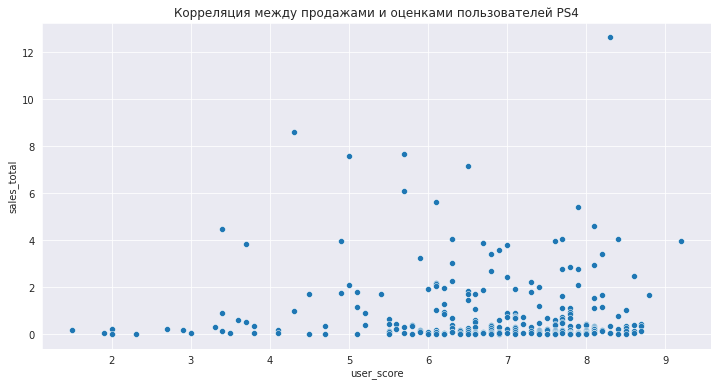

In [34]:
#Зависимость оценками пользователей и критиков с продажами одной из платформ

play_s4_actual_data = actual_data_games_sales.query('platform =="PS4"')

#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='sales_total', data=play_s4_actual_data)
plt.title('Корреляция между продажами и оценками пользователей PS4')


In [35]:
play_s4_actual_data['user_score'].corr(play_s4_actual_data['sales_total'])

-0.031957110204556376

Text(0.5, 1.0, 'Корреляция между продажами и оценками критиков PS4')

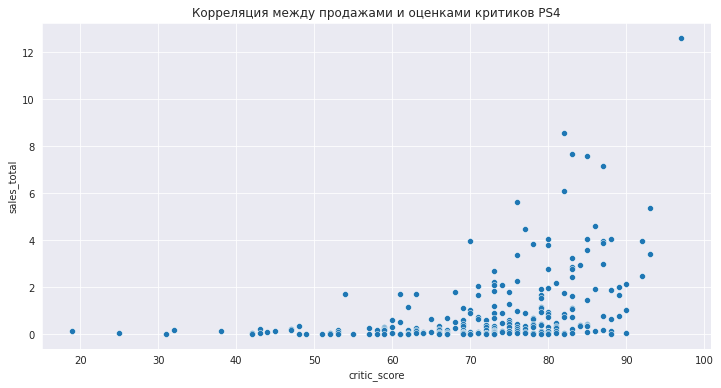

In [36]:
#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='sales_total', data=play_s4_actual_data)
plt.title('Корреляция между продажами и оценками критиков PS4')


In [37]:
type('critic_score')

str

In [38]:
type('sales_total')

str

In [39]:
# код ревьюера
play_s4_actual_data['critic_score'].dtype

dtype('float64')

In [40]:
play_s4_actual_data['critic_score'].unique()

array([nan, 97., 82., 83., 85., 87., 76., 93., 86., 77., 88., 80., 92.,
       70., 78., 84., 73., 81., 90., 74., 71., 89., 79., 68., 75., 63.,
       54., 61., 62., 69., 67., 65., 72., 60., 48., 66., 59., 57., 43.,
       47., 32., 53., 58., 38., 45., 19., 44., 64., 42., 25., 52., 31.,
       55., 49., 51.])

In [41]:
play_s4_actual_data['critic_score'].corr(play_s4_actual_data['sales_total'])

0.40656790206178095


Таким же образом я делаю рассеивание и корреляцию для остальных платформ (PS3, XOne, X360), чтобы сравнить зависимости


Text(0.5, 1.0, 'Корреляция между продажами и оценками пользователей PS3')

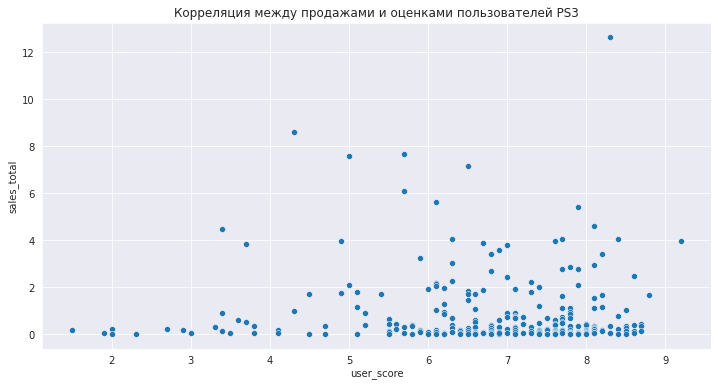

In [42]:
#Зависимость оценками пользователей и критиков с продажами одной из платформ

play_s3_actual_data = actual_data_games_sales.query('platform =="PS3"')

#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='sales_total', data=play_s4_actual_data)
plt.title('Корреляция между продажами и оценками пользователей PS3')

In [43]:
play_s3_actual_data['user_score'].corr(play_s3_actual_data['sales_total'])

0.0023944027357566925

Text(0.5, 1.0, 'Корреляция между продажами и оценками критиков PS3')

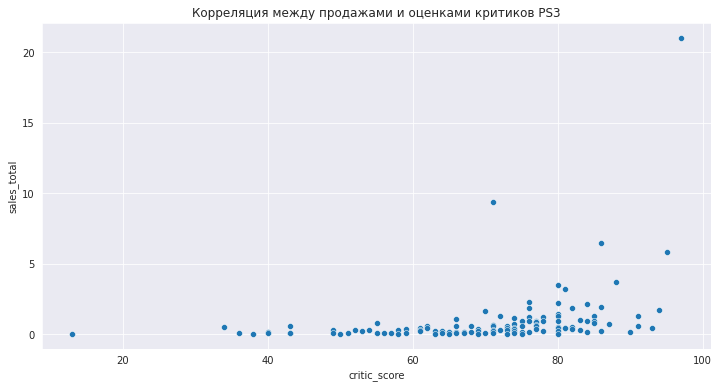

In [44]:
#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='sales_total', data=play_s3_actual_data)
plt.title('Корреляция между продажами и оценками критиков PS3')

In [45]:
play_s3_actual_data['critic_score'].corr(play_s3_actual_data['sales_total'])

0.3342853393371919

Платформа XOne

Text(0.5, 1.0, 'Корреляция между продажами и оценками пользователей XOne')

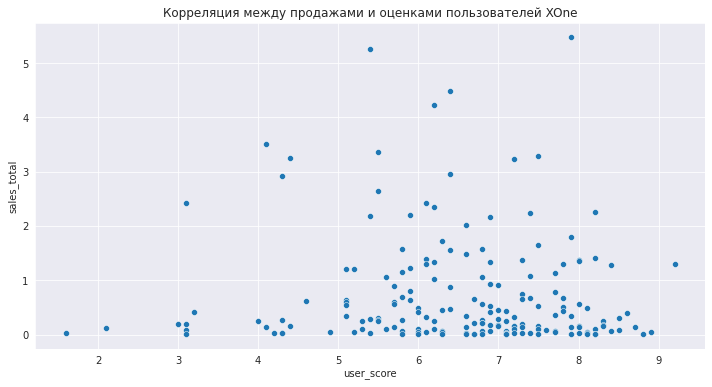

In [46]:
#Зависимость оценками пользователей и критиков с продажами одной из платформ

XOne_actual_data = actual_data_games_sales.query('platform =="XOne"')

#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='sales_total', data=XOne_actual_data)
plt.title('Корреляция между продажами и оценками пользователей XOne')

In [47]:
XOne_actual_data['user_score'].corr(XOne_actual_data['sales_total'])

-0.06892505328279414

Text(0.5, 1.0, 'Корреляция между продажами и оценками критиков XOne')

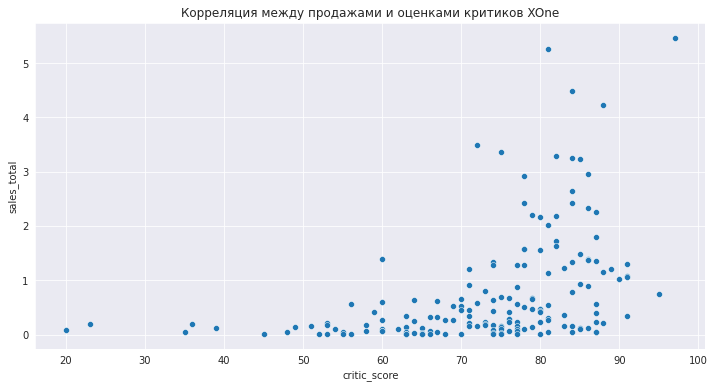

In [48]:
#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='sales_total', data=XOne_actual_data)
plt.title('Корреляция между продажами и оценками критиков XOne')

In [49]:
XOne_actual_data['critic_score'].corr(XOne_actual_data['sales_total'])

0.4169983280084017

Платформа X360

Text(0.5, 1.0, 'Корреляция между продажами и оценками пользователей X360')

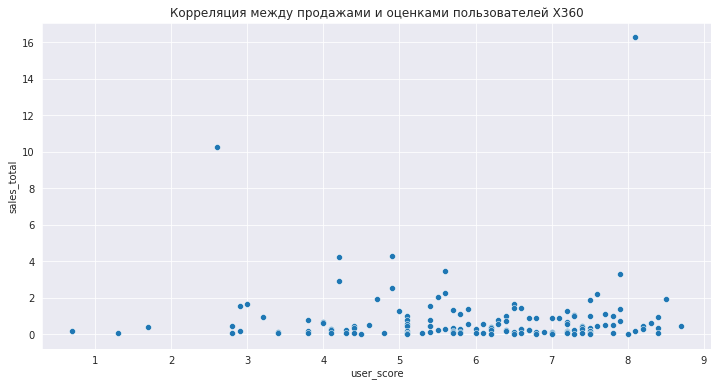

In [50]:
#Зависимость оценками пользователей и критиков с продажами одной из платформ

X360_actual_data = actual_data_games_sales.query('platform =="X360"')

#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='sales_total', data=X360_actual_data)
plt.title('Корреляция между продажами и оценками пользователей X360')

In [51]:
X360_actual_data['user_score'].corr(X360_actual_data['sales_total'])

-0.011742185147181342

Text(0.5, 1.0, 'Корреляция между продажами и оценками критиков X360')

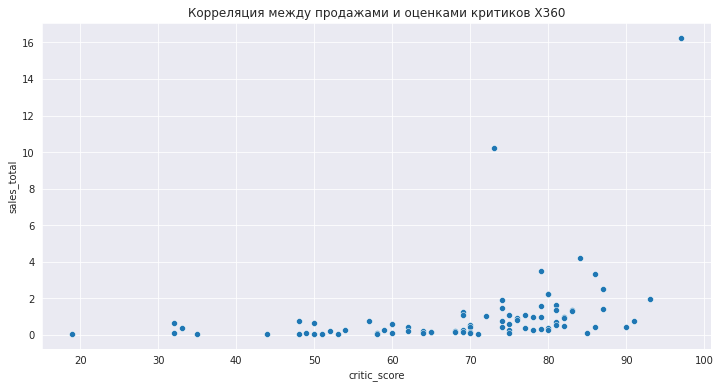

In [52]:
#Построим диаграмму рассеяния
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='sales_total', data=X360_actual_data)
plt.title('Корреляция между продажами и оценками критиков X360')

In [53]:
X360_actual_data['critic_score'].corr(X360_actual_data['sales_total'])

0.3503445460228664

#### Вывод по корреляции:
Мы видим, что корреляция между продажами и оценками критиков боольше, чем корреляция между продажами и оценками пользоваелей, причем это просматривается у всех анализируемых платформ. Это говорит о том, что покупатели прислушиваются больше к критикам, нежели к оценкам других пользователей.


In [54]:
distr_genre = actual_data_games_sales.pivot_table(index='genre', values='sales_total', aggfunc='median').sort_values('sales_total', ascending=False).reset_index()
distr_genre

,genre,sales_total
0,Shooter,0.450
1,Sports,0.240
2,Platform,0.225
3,Role-Playing,0.125
4,Fighting,0.125
5,Racing,0.120
6,Action,0.110
7,Simulation,0.100
8,Misc,0.100
9,Strategy,0.080


Text(0, 0.5, 'Продажи')

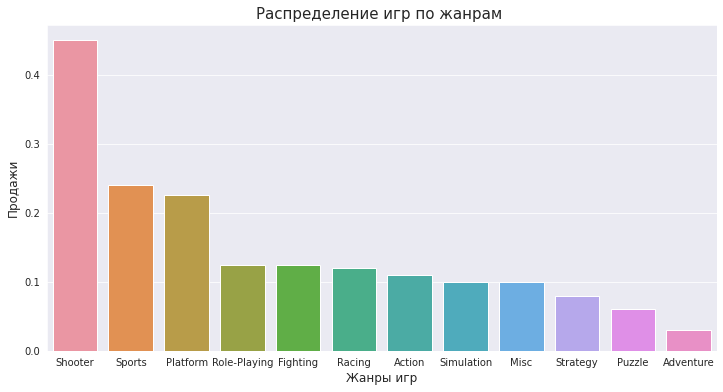

In [55]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='sales_total')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

#### Вывод по исследовательскому анализу данных:
Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с начала 2000х до 2008 года. С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.
Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.
Средняя жизнь игровой платформы составляет 10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.
Больше всего было продано игр на Sony Playstation и Xbox 360.
У анализируемых нами платформ наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки почти не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей.
Самый популярный жанр за последние 10 лет: 'Action'. Самый непопулярный жанр 'Puzzle'.


# Шаг 4. Составьте портрет пользователя каждого региона

Text(0, 0.5, 'Количество продаж')

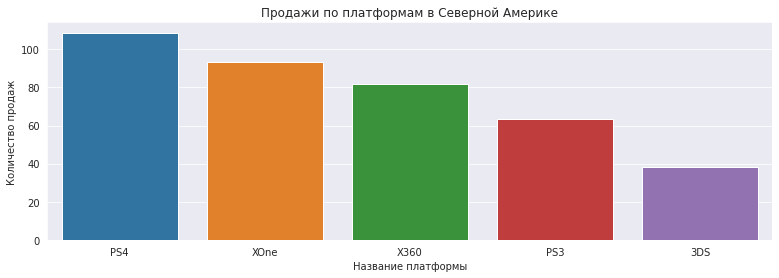

In [56]:
na_platform_pivot_table = actual_data_games_sales.pivot_table(index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False).head()
na_platform_pivot_table

plt.figure(figsize=(13,4))
sns.barplot(x=na_platform_pivot_table.index,y=na_platform_pivot_table['na_sales'])
plt.title("Продажи по платформам в Северной Америке")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Text(0, 0.5, 'Количество продаж')

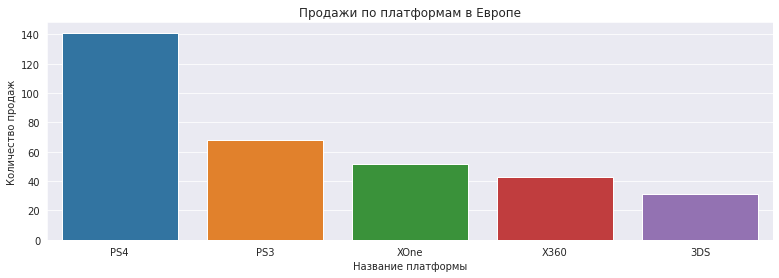

In [57]:
eu_platform_pivot_table = actual_data_games_sales.pivot_table(index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False).head()
eu_platform_pivot_table

plt.figure(figsize=(13,4))
sns.barplot(x=eu_platform_pivot_table.index,y=eu_platform_pivot_table['eu_sales'])
plt.title("Продажи по платформам в Европе")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Text(0, 0.5, 'Количество продаж')

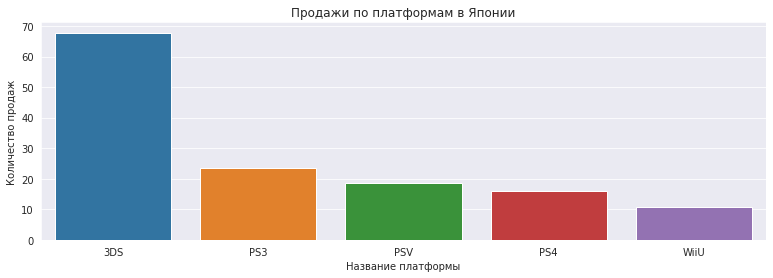

In [58]:
jp_platform_pivot_table = actual_data_games_sales.pivot_table(index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False).head()
jp_platform_pivot_table

plt.figure(figsize=(13,4))
sns.barplot(x=jp_platform_pivot_table.index,y=jp_platform_pivot_table['jp_sales'])
plt.title("Продажи по платформам в Японии")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Рейтинг платформ:

Топ 5 по Северной Америке: PS4, XOne, X360, PS3 и 3DS  
Топ 5 по Европейскому региону: PS4, PS3, XOne, X360 и 3DS  
Топ 5 по Японии: 3DS, PS3, PSV, PS4 и WiiU  

Популярность XOne и X360 в Америке обусловлена крупным игроком на рынке в регионе - компания Microsoft. В Японии похожее положение занимает компания Nintendo c двумя продуктами 3DS и WiiU. Европейский рынок смотрит на общую популярность платформы, так как как нет крупных компаний по разработке платформ.

На Американском рынке по продажам соревнуются PS4 и XOne. Это вечные конкуренты и компания Microsoft не хочет отставать по продажам в своем регионе. В Европе нет такой сильной конкуренции - люди выбирают лучший и популярный продукт PS4. В Японии высокая конкуренция Nintendo и Sony за пользователей. Как видно у первой компании есть успехи в родном регионе. Но плохие показатели за его пределами. В целом продажи меньше, так как в этом регионе меньше игроков.

Найдем по каждому региону популярный жанр.

Text(0, 0.5, 'Количество продаж')

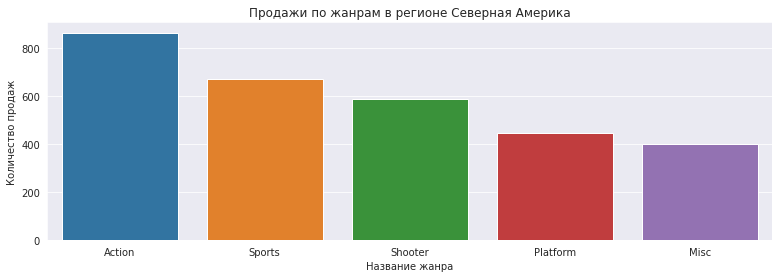

In [59]:
na_genre_pivot_table = data.pivot_table(index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False).head()
na_genre_pivot_table

plt.figure(figsize=(13,4))
sns.barplot(x=na_genre_pivot_table.index,y=na_genre_pivot_table['na_sales'])
plt.title("Продажи по жанрам в регионе Северная Америка")
plt.xlabel("Название жанра")
plt.ylabel("Количество продаж")


Text(0, 0.5, 'Количество продаж')

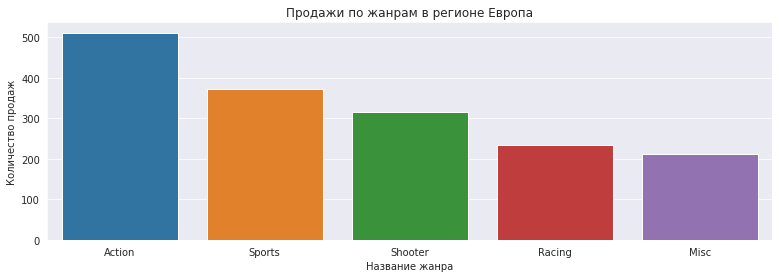

In [60]:
eu_genre_pivot_table = data.pivot_table(index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False).head()
eu_genre_pivot_table

plt.figure(figsize=(13,4))
sns.barplot(x=eu_genre_pivot_table.index,y=eu_genre_pivot_table['eu_sales'])
plt.title("Продажи по жанрам в регионе Европа")
plt.xlabel("Название жанра")
plt.ylabel("Количество продаж")


Text(0, 0.5, 'Количество продаж')

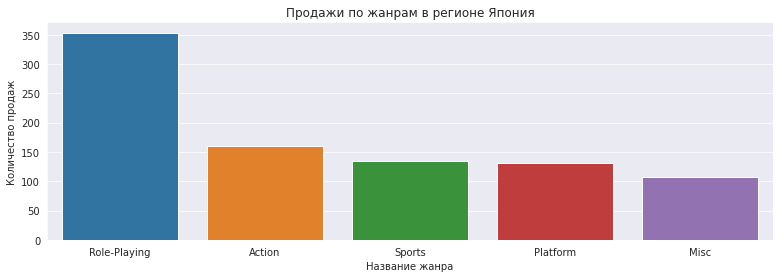

In [61]:
jp_genre_pivot_table = data.pivot_table(index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False).head()
jp_genre_pivot_table

plt.figure(figsize=(13,4))
sns.barplot(x=jp_genre_pivot_table.index,y=jp_genre_pivot_table['jp_sales'])
plt.title("Продажи по жанрам в регионе Япония")
plt.xlabel("Название жанра")
plt.ylabel("Количество продаж")


Рейтинг жанров:

Топ 5 по Северной Америке: Action, Shooter, Sports, Role-Playing и Misc  
Топ 5 по Европейскому региону: Action, Shooter, Sports, Role-Playing и Racing  
Топ 5 по Японии: Role-Playing, Action, Misc, Fighting и Shooter  

Американские и европейские игроки имеют схожите тенденции по жанрам в целом. Японские отличаются от них большим вкладом в игры с глубоким смыслом. Вне зависимости от региона всегда будут популярны игры экшен и шутеры

Найдем влияние рейтинга на каждый регион.

Text(0, 0.5, 'Количество продаж')

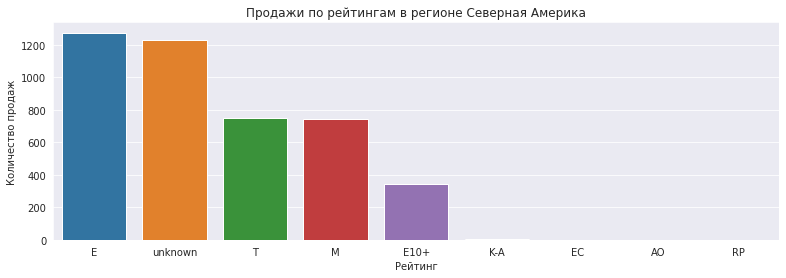

In [62]:
na_rating_pivot_table = data.pivot_table(index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_rating_pivot_table

plt.figure(figsize=(13,4))
sns.barplot(x=na_rating_pivot_table.index,y=na_rating_pivot_table['na_sales'])
plt.title("Продажи по рейтингам в регионе Северная Америка")
plt.xlabel("Рейтинг")
plt.ylabel("Количество продаж")


Text(0, 0.5, 'Количество продаж')

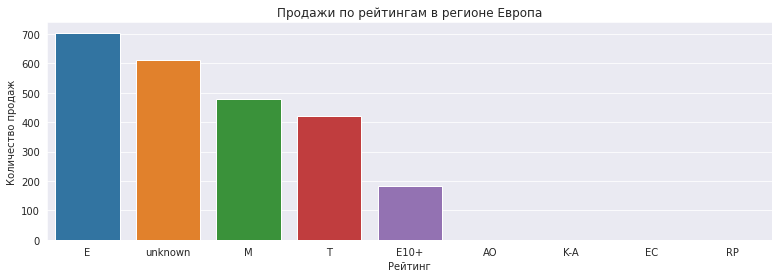

In [63]:
eu_rating_pivot_table = data.pivot_table(index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_rating_pivot_table

plt.figure(figsize=(13,4))
sns.barplot(x=eu_rating_pivot_table.index,y=eu_rating_pivot_table['eu_sales'])
plt.title("Продажи по рейтингам в регионе Европа")
plt.xlabel("Рейтинг")
plt.ylabel("Количество продаж")


Text(0, 0.5, 'Количество продаж')

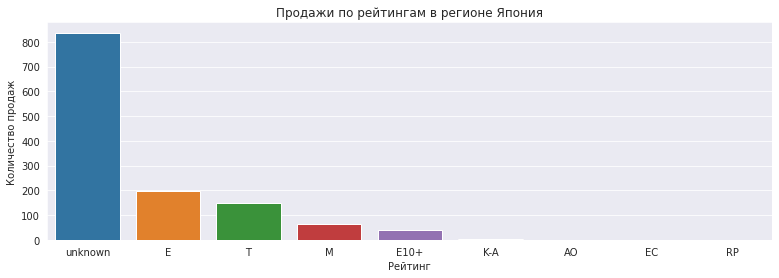

In [64]:
jp_rating_pivot_table = data.pivot_table(index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_rating_pivot_table

plt.figure(figsize=(13,4))
sns.barplot(x=jp_rating_pivot_table.index,y=jp_rating_pivot_table['jp_sales'])
plt.title("Продажи по рейтингам в регионе Япония")
plt.xlabel("Рейтинг")
plt.ylabel("Количество продаж")


В Америке и Европе схожие ситуации - в первую очередь популярны игры с возрастным рейтингом 17+. Это означает, что эти рынки ориентированы на взрослых пользователей.

В Японии лидириуют игры с возрастным рейтингом 13+. Компании хотят распространить свое влияние на новое поколение.

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде.  
Думаю, что в Японии просто другая система определения рейтингов, эта система всё таки распространена больше в Европе и Америке, там ведь даже обозначения все на латинице.

Американский игрок - от 17 лет, любит играть или на PS4, или на XOne, любит экшн и шутеры. Европейский игрок - от 17 лет, любит играть на PS4, любит экшн и шутеры. Японский игрок - от 13 лет, любит играть на переносных платформах 3DS или PSV, любит Role-Playing и экшены.


# Шаг 5. Проверьте гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые


Сформулируем нулевые гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [65]:
# Сохраним в переменных соответствующие данные
xone_r = data[(data['platform']=='XOne') & (data['year_of_release']>2012)]['user_score']
pc_r = data[(data['platform']=='PC') & (data['year_of_release']>2012)]['user_score']

#Посчитаем средний рейтинг пользователя для xbox платформ
xone_r.mean()

6.521428571428572

In [66]:
pc_r.mean()

6.269677419354839

In [67]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [68]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = 0.1

results = st.ttest_ind(xone_r, pc_r, nan_policy='omit', equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1475959401343032
Не получилось отвергнуть нулевую гипотезу



Тут делаем вывод о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    


Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [69]:
genre_action_r = data[(data['genre']=='Action') & (data['year_of_release']>2012)]['user_score']
genre_sports_r = data[(data['genre']=='Sports') & (data['year_of_release']>2012)]['user_score']

#выведем среднюю оценку по жанру экшн
genre_action_r.mean()

6.837532133676093

In [70]:
genre_sports_r.mean()

5.238124999999999

In [71]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [72]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = 0.1

results = st.ttest_ind(genre_action_r, genre_sports_r, nan_policy='omit', equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700703482e-20
Отвергаем нулевую гипотезу


Таким образом делаем вывод в пользу альтернативной гипотезы - средние пользовательские рейтинги жанров Action и Sports различаются.


Вывод второй гипотезы:  
    
Мы можем отвергнуть гипотезу и сказать, что средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые отличия. Рейтинги жанра Action значительно привалируют над Sports.


# Общий вывод

### Вывод:  
    
Просмотрена таблица, выявлены аномалии и пропущенные значения. Проведена предобработка таблицы: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.Был проведён исследовательский анализ данных о продажах игр, оценках пользователей и экспертов, а так же анализ игровых жанров и платформ. Так же были составлены портреты пользователей для таких регионов как NA, EU, JP. В ходе анализа было выявлено сколько игр выпускалось в разные годы, так же были изучены продажи для каждой платформы и определены платформы лидирующие по продажам. Было изучено влияние отзывов пользователей и критиков на продажи внутри платформы, проведено сравнение зависимости продаж игр на всех платформах. Также был выполнен анализ игровых жанров и прибыльности каждого жанра. Основываясь на полученных результатах исследования были проверены следующие гипотезы:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - гипотеза не отвергнута
Средние пользовательские рейтинги жанров Action и Sports разные - гипотеза отвергнута
    
За весь период консольных приставок самые популярные оказались: PS4, PS3, XOne, X360 и 3DS. Также мы выявили, что средняя продолжительность жизни игровой приставки составляет порядка 10 лет. Самый пик продаж наступает примерно через 5 лет после выпуска консоли. У платформ лидеров наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей. Самый популярный жанр за последние 10 лет: 'Action'.


### Вывод для отдела маркетинга:  
На продажи игр влияют несколько факторов: регион производителя, платформа и жанр игры. 

В каждом регионе есть свои особенности, но сильнее всего отличается Япония. Мы построили для каждого региона портреты целевой аудитории для каждой их которой мы выделили популярные платформы, жанры и рейтинги.
Платформа определяет технические возможности разработчиков. Здесь есть прямая зависимость: лучше платформа значит можно сделать игру лучше. Жизненный цикл в 5-12 лет обусловлен скачками в технологиях процессора, оперативной и видеопамяти.
Жанр - это то, что выбирает игрок. Каждый человек уникален, и не каждому игроку будет по душе одновременно стратегия и шутеры. Соответсвенно студии-разработчики и издатели боряться за целевую аудиторию своего продукта.
        
Топ 5 по Северной Америке: PS4, XOne, X360, PS3 и 3DS  
Топ 5 по Европейскому региону: PS4, PS3, XOne, X360 и 3DS  
Топ 5 по Японии: 3DS, PS3, PSV, PS4 и WiiU  

Топ 5 по Северной Америке: Action, Shooter, Sports, Role-Playing и Misc  
Топ 5 по Европе: Action, Shooter, Sports, Role-Playing и Racing  
Топ 5 по Японии: Role-Playing, Action, Misc, Fighting и Shooter  
    
Топ рейтингов по Северной Америке:  "От 17 и выше" , "от 13 и выше" и "для всех"  
Топ рейтингов по Европе: "От 17 и выше", "для всех", "от 13 и выше".  
Топ рейтингов по Японии: "От 13 и выше", "от 17 и выше", "для всех"  
  
У анализируемых нами платформ наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки почти не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей. Поэтому стоит использовать этот рычаг для продвижения игр. 
    
Для 2017 года большую часть прибыли будут приносить игры жанра Shooter, для платформы PS4 и с рейтингом от 17 и выше.
 